In [1]:
pip install git+https://github.com/tensorflow/examples

  Cloning https://github.com/tensorflow/examples to /tmp/pip-req-build-0ddpttdd
  Running command git clone -q https://github.com/tensorflow/examples /tmp/pip-req-build-0ddpttdd
  Created wheel for tensorflow-examples: filename=tensorflow_examples-537a2dc161e17ac3eb6e86068daccf7c2cf93c1b_-cp36-none-any.whl size=114175 sha256=cb20220f8297a624744d858c9310290e5827bd6096e6a6aea0a2f9979dcbd40c
  Stored in directory: /tmp/pip-ephem-wheel-cache-1tazpc2h/wheels/e7/73/87/5fb46323c874b9ed2c75b19999dcf82a37030e6c17501164b6
Successfully built tensorflow-examples


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from IPython.display import clear_output
from tensorflow_examples.models.pix2pix import pix2pix

In [0]:
tfds.disable_progress_bar()

In [4]:
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info = True)

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.1.0.incompleteX9O1DV/oxford_iiit_pet-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.1.0.incompleteX9O1DV/oxford_iiit_pet-test.tfrecord
Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.1.0. Subsequent calls will reuse this data.


In [0]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [0]:
@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [0]:
def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [0]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [0]:
train = dataset['train'].map(load_image_train, num_parallel_calls = tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [0]:
def display(display_list):
  plt.figure(figsize = (15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

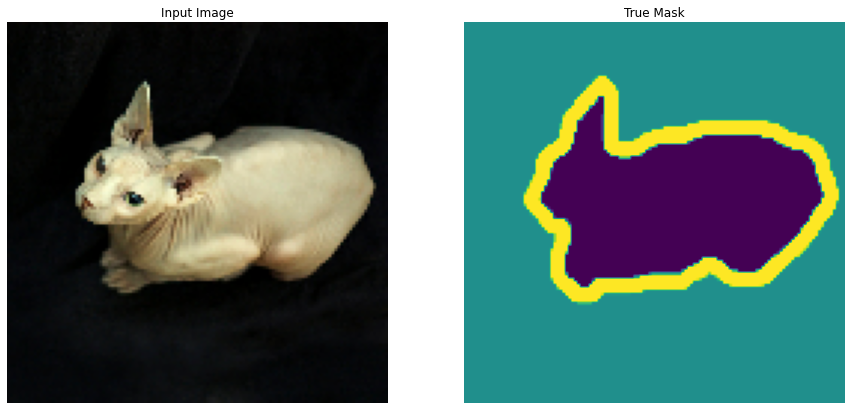

In [11]:
for image, mask in train.take(1):
  sample_image, sample_mask = image, mask
display([sample_image, sample_mask])